# Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
pd.options.display.max_columns = 999

# 1. Выбор начальных условий

### a. Выбрать набор данных для задачи классификации - Задача по оценке Качества вина
1 - fixed acidity - фиксированная кислотность\
2 - volatile acidity - летучая кислотность\
3 - citric acid - лимонная кислота\
4 - residual sugar - остаточный сахар\
5 - chlorides - хлориды\
6 - free sulfur dioxide - свободный диоксид серы\
7 - total sulfur dioxide - общий диоксид серы\
8 - density - плотность\
9 - pH\
10 - sulphates - сульфаты\
11 - alcohol - спирт\
Выходная переменная (на основе сенсорных данных):\
12 - quality - качество (оценка от 0 до 10)

### b.Выбрать набор данных для задачи регрессии - Задача по предсказанию баллов за экзамен у студентов
1 - student_id - ID студента\
2 - age - возраст\
3 - gender - пол\
4 - major - специальность\
5 - study_hours_per_day - учебные часы в день\
6 - social_media_hours - часы в соцсетях\
7 - netflix_hours - часы просмотра Netflix\
8 - part_time_job - подработка\
9 - attendance_percentage - процент посещаемости\
10 - sleep_hours - часы сна\
11 - diet_quality - качество питания\
12 - exercise_frequency - частота занятий спортом\
13 - parental_education_level - уровень образования родителей\
14 - internet_quality - качество интернета\
15 - mental_health_rating - оценка психического здоровья\
16 - extracurricular_participation - участие во внеурочной деятельности\
17 - previous_gpa - предыдущий средний балл\
18 - semester - семестр\
19 - stress_level - уровень стресса\
20 - dropout_risk - риск отчисления\
21 - social_activity - социальная активность\
22 - screen_time - время у экрана\
23 - study_environment - учебная среда\
24 - access_to_tutoring - доступ к репетиторству\
25 - family_income_range - диапазон дохода семьи\
26 - parental_support_level - уровень поддержки родителей\
27 - motivation_level - уровень мотивации\
28 - exam_anxiety_score - балл тревожности на экзаменах\
29 - learning_style - стиль обучения\
30 - time_management_score - балл управления временем\
Выходная переменная:\
31 - exam_score - оценка за экзамен\

In [6]:
Wine_data = pd.read_csv('data/classification/WineQT.csv').set_index('Id')
Student_data = pd.read_csv('data/Regression/enhanced_student.csv').set_index('student_id')

Выгрузка данных. Далее выведем первые 5 строк данных и взглянем на них более внимательно

In [8]:
Wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
Student_data.head()

,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
student_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,3,Some College,High,6.0,Yes,4.00,5,5.8,No,0,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,4,PhD,Low,6.8,No,4.00,7,5.8,No,5,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,4,High School,Low,5.7,Yes,3.79,4,8.0,No,5,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,3,Master,Medium,8.5,Yes,4.00,6,4.6,No,3,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,6,PhD,Low,9.2,No,4.00,4,5.7,No,2,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


### c. Выбрать метрики качества и обосновать их выбор

#### Метрики выбранные для Датасета про Качество вина (Классификация):
1.Accuracy - Самая базовая метрика, доля правильно предсказанных. Если классы сбалансированы\
2.Precision-weighted - если важно не завышать оценки\
3.recall-weighted - если важно не занижать оценки\
4.F1-score (weighted) - Метрика для случая если целевая переменная имеет сильный дисбаланс классов, баланс precision/recall

#### Метрики выбранные для Датасета про студентов (Регрессии):
1.MAE (Mean Absolute Error) - интерпретируем в исходных единицах\
2.RMSE (Root Mean Square Error) - штрафует за большие ошибки\
3.MAPE (Mean Absolute Percentage Error) - относительная ошибка в %

# 2.Создание бейзлайна и оценка качества

Перед началом создания и обучения моделей закодируем данные в Датасете студентов для корректной работы моделей sklearn

In [15]:
categorical_cols = Student_data.select_dtypes(include=['object']).columns # Берём все категориальные данные

binary_cols = [col for col in categorical_cols if Student_data[col].nunique() == 2] # Разделяем на бинарные и небинарные
non_binary_cols = [col for col in categorical_cols if Student_data[col].nunique() > 2]
Student_data = pd.get_dummies(Student_data, columns=binary_cols, drop_first=True) # get_dummies для бинарных

if non_binary_cols:
    encoder = OrdinalEncoder() # OrdinalEncoder для небинарных
    Student_data[non_binary_cols] = encoder.fit_transform(Student_data[non_binary_cols])

Кодировка данных происходит благодаря get_dummies и OrdinalEncoder, первые используем для кодировки бинарных признаков, второй это базовый энкодер который используется для небинарных признаков

### a.Обучить модели из sklearn (для классификации и регрессии) для выбранных наборов данных

Разделим данные на X - признаки и Y - Целевая

In [19]:
X_Wine = Wine_data.drop(['quality'], axis = 1)
y_Wine = Wine_data['quality']

X_Student = Student_data.drop(['exam_score'], axis = 1)
y_Student = Student_data['exam_score']

разделим данные на обучающую и тестовую выборку при помощи train_test_split

In [21]:
X_train_Student, X_test_Student, y_train_Student, y_test_Student = train_test_split(X_Student, y_Student, test_size=0.33, random_state=42)
X_train_Wine, X_test_Wine, y_train_Wine, y_test_Wine = train_test_split(X_Wine, y_Wine, test_size=0.33, random_state=42)

Создадим и обучим модель на разделённых данных

In [23]:
KNN_wine = KNeighborsClassifier()
KNN_Student = KNeighborsRegressor()

KNN_wine.fit(X_train_Wine, y_train_Wine)
KNN_Student.fit(X_train_Student, y_train_Student)

KNeighborsRegressor()

После обучения обоих моделей выведем все метрики на экран и сделаем выводы по работе моделей

In [25]:
Wine_predict = KNN_wine.predict(X_test_Wine)
Student_predict = KNN_Student.predict(X_test_Student)

print('Метрики Классификации качества Вина:')
print(f'Accuracy:  {accuracy_score(y_test_Wine, Wine_predict)} \n'
      f'Recall:    {recall_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'Precision: {precision_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'F1:        {f1_score(y_test_Wine, Wine_predict, average="weighted")}')
print('=====================================')
print('Метрики Регрессии по экзаменам студентов:')
print(f'MAE:  {mean_absolute_error(y_test_Student, Student_predict)} \n'
      f'RMSE: {np.sqrt(mean_squared_error(y_test_Student, Student_predict))} \n'
      f'MAPE: {mean_absolute_percentage_error(y_test_Student, Student_predict)}')

Метрики Классификации качества Вина:
Accuracy:  0.48148148148148145 
Recall:    0.48148148148148145 
Precision: 0.47100628462130806 
F1:        0.46173245638775134
Метрики Регрессии по экзаменам студентов:
MAE:  8.958128787878787 
RMSE: 11.254673978558257 
MAPE: 0.1093365927891705


### Метрики Классификации качества Вина
Все метрики оказались в районе половины, что говорит что данная модель смогла правильно предсказать лишь половину данных в Датасете, есть куда расти

### Метрики Регрессии по экзаменам студентов
В данном датасете метрики показали себя куда лучше. Абсолютная ошибка составила лишь 8.9, когда распределение нашей целевой должно быть от 0 до 100, так же Абсолютная процентная ошибка составила 0.1, это очень хороший результат для такой слабой модели на базовом бейзлайне

# 3.Улучшение бейзлайна

##### Для задачии Классификации (Оценка качества вина) сделаем следующее:
- Проверим целевую переменную на дисбаланс классов
- Выведем матрицу корреляции признаков
- Проведём масштабированние данных
##### Для задачии Регрессии (Предсказать оценку студента) сделаем следующее:
- Посмотрим на распределение целевой переменной
- Выведем матрицу корреляции признаков
- Проведём масштабированние данных
##### Для модели сделаем следующее:
- Подберём Гиперпараметры через GridSearchCV
- Применим Кросс-валидацию при обучении модели

### Проверим целевую переменную на дисбаланс классов (Классификация)

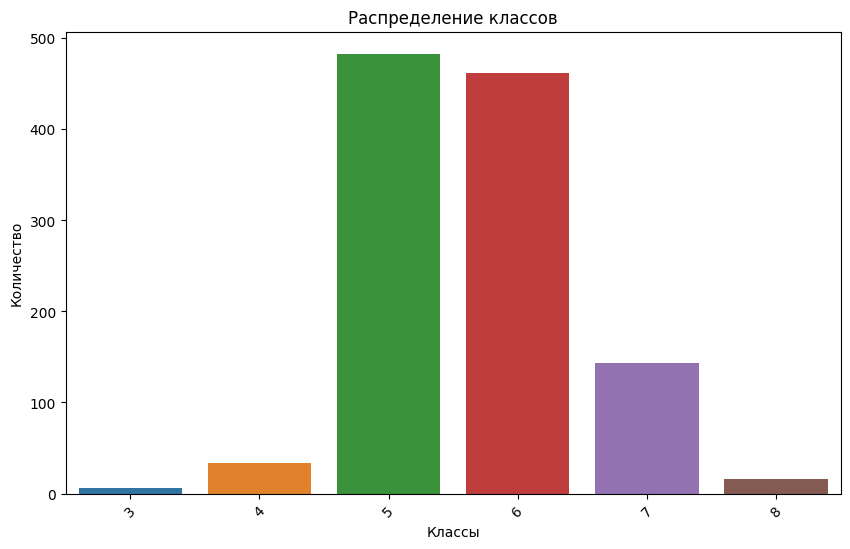

In [31]:
class_counts = pd.Series(y_Wine).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

В распределении целевой переменной Классификации заметен явный дисбаланс, в дальнейшем исправим это при помощи SMOTE (Synthetic Minority Over-sampling Technique). Данный алгоритм создает искусственные примеры для миноритарных классов вместо простого дублирования существующих данных.

### Выведем матрицу корреляции признаков (Классификация)

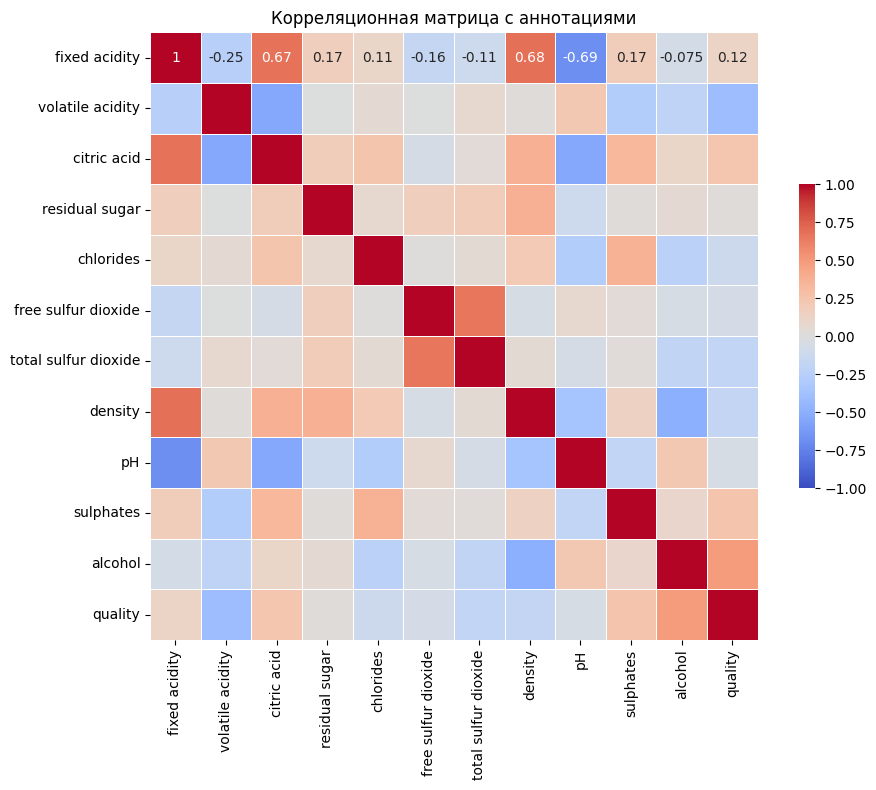

In [34]:
corr = Wine_data.corr()

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Корреляционная матрица с аннотациями')
plt.tight_layout()
plt.show()

В матрице Корреляции признаков между собой можно заметить, что самым важным признаком в данных для качества вина является процентиль алкоголя в нём, более тут ничего нельзя сказать

### Проверим распределение целевой переменной в задачи Регрессии

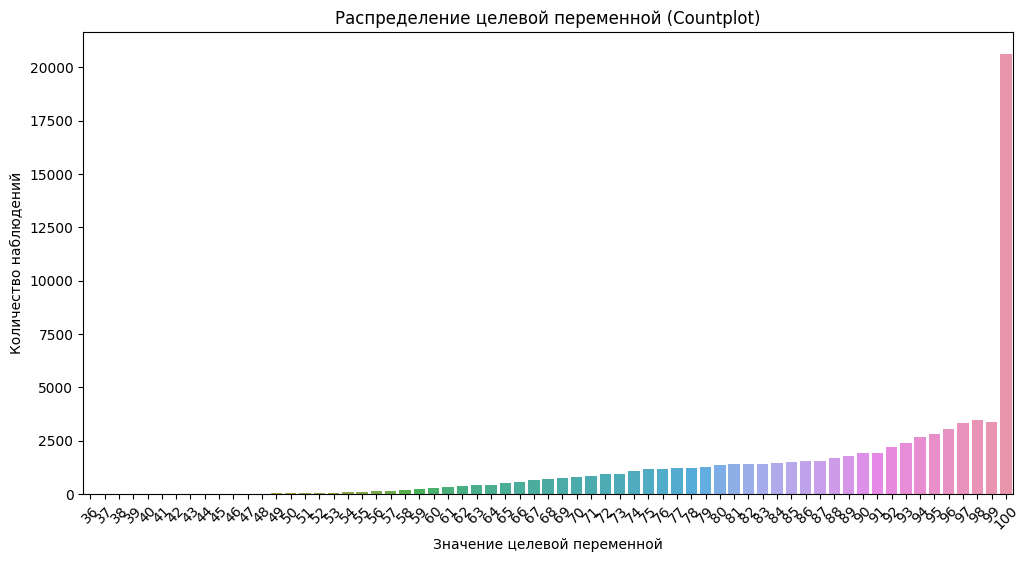

In [37]:
plt.figure(figsize=(12, 6))
# Countplot для целевой переменной
sns.countplot(data=Student_data, x='exam_score')
plt.title('Распределение целевой переменной (Countplot)')
plt.xlabel('Значение целевой переменной')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.show()

На распределение целевой переменной регрессии заметно, что большая половина студентов сдаёт экзамен на 100 баллов, а ниже 49 и вовсе никого нету, это так же может плохо повлиять на работу модели

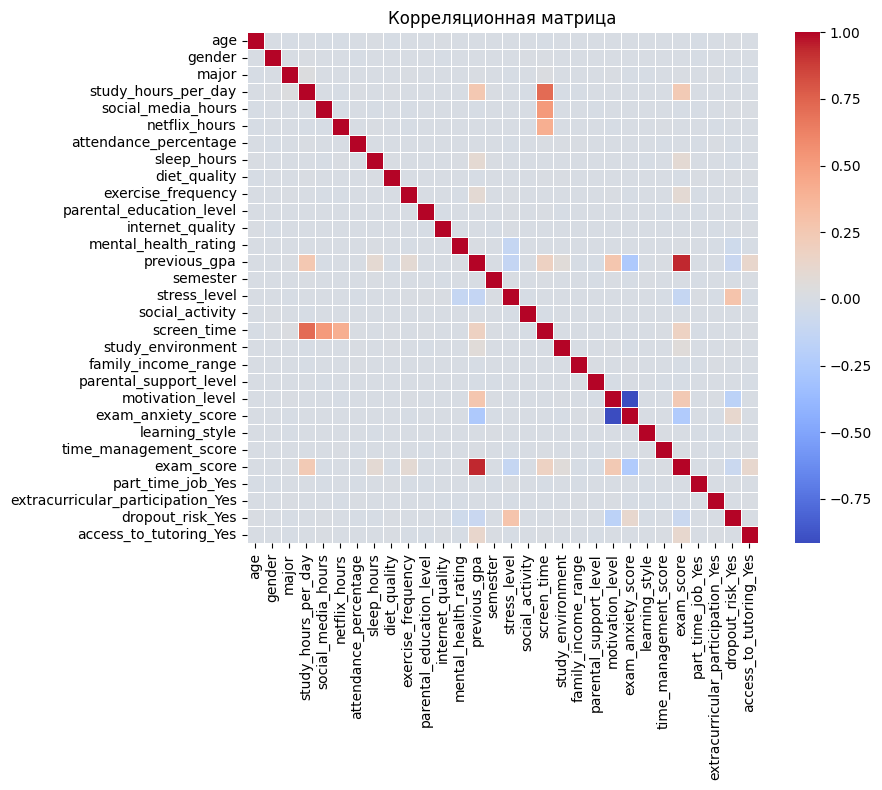

In [39]:
corr = Student_data.corr()

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

Матрица корреляции в датасете Успеваемости студентов признаки толком никак не связаны друг с другом, даже у целевой переменной корреляция слабая со многими, кроме одного, признака отвечающего на прошлый средний балл студента.

### Препроцессинг данных Классификации Вина

Для начала обработаем данные классификации избавившись от дисбаланса при помощи SMOTE (Synthetic Minority Over-sampling Technique) и снова выведем график распределения целевой, а далее применим масштабированние

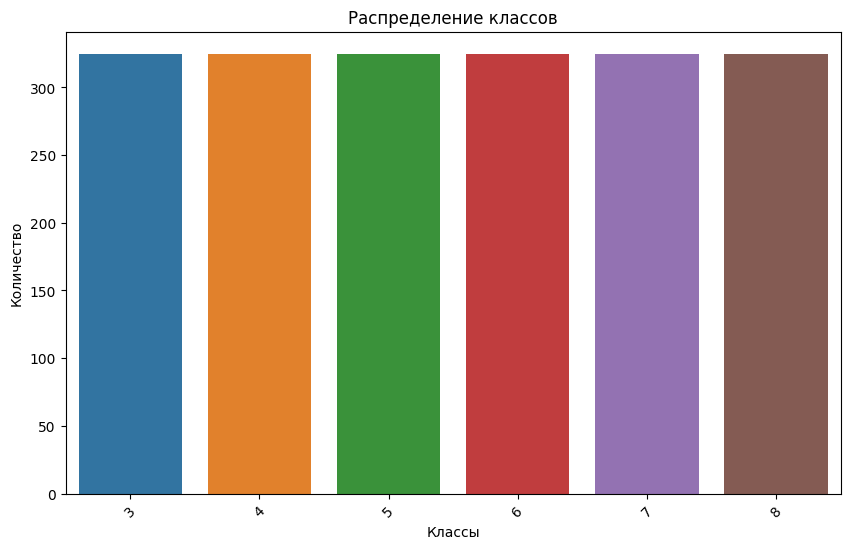

In [81]:
smote = SMOTE(random_state=42, k_neighbors=4)
X_train_wine_smote, y_train_wine_smote = smote.fit_resample(X_train_Wine, y_train_Wine)

class_counts = pd.Series(y_train_wine_smote).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Как заметно на графике, дисбаланс классов был полностью устранён, далее промасштабируем данные, это очень важно для моделей которые работают с расстоянием в данных, такие как KNN

In [84]:
Scaler_wine = StandardScaler()
X_train_wine_smote_scale = Scaler_wine.fit_transform(X_train_wine_smote)
X_test_Wine_scale = Scaler_wine.transform(X_test_Wine)

Масштабируем данные ОБЯЗАТЕЛЬНО после train_test_split чтобы не было утечки данных в тестовую выборку и модель показывала корректные метрики

### Препроцессинг данных Регрессии Результаты студентов

In [88]:
Scaler_student = StandardScaler()
X_train_Student_scale = Scaler_student.fit_transform(X_train_Student)
X_test_Student_scale = Scaler_student.transform(X_test_Student)

### Создание моделей, обучение на обработанных данных и применение GridSearchCV для подбора гиперпараметров

In [50]:
Parameters_Wine = {
    'n_neighbors': range(3, 10),
    'weights': ['uniform', 'distance'],
}
KNN_wine = KNeighborsClassifier()
KNN_wine_grid = GridSearchCV(estimator=KNN_wine, param_grid=Parameters_Wine, cv=5)
KNN_wine_grid.fit(X_train_wine_smote_scale, y_train_wine_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 10),
                         'weights': ['uniform', 'distance']})

In [51]:
Parameters_Student = {
    'n_neighbors': range(3, 10),
    'weights': ['uniform', 'distance'],
}
KNN_student = KNeighborsRegressor()
KNN_student_grid = GridSearchCV(estimator=KNN_student, param_grid=Parameters_Student, cv=5)
KNN_student_grid.fit(X_train_Student_scale, y_train_Student)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(3, 10),
                         'weights': ['uniform', 'distance']})

После успешного обучения моделей, выведем метрики нового бейзлайна и сравним результаты

In [53]:
Wine_predict = KNN_wine_grid.predict(X_test_Wine_scale)
Student_predict = KNN_student_grid.predict(X_test_Student_scale)

print('Метрики Классификации качества Вина на новом бейзлайне:')
print(f'Accuracy:  {accuracy_score(y_test_Wine, Wine_predict)} \n'
      f'Recall:    {recall_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'Precision: {precision_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'F1:        {f1_score(y_test_Wine, Wine_predict, average="weighted")}')
print('=====================================')
print('Метрики Регрессии по экзаменам студентов на новом бейзлайне:')
print(f'MAE:  {mean_absolute_error(y_test_Student, Student_predict)} \n'
      f'RMSE: {np.sqrt(mean_squared_error(y_test_Student, Student_predict))} \n'
      f'MAPE: {mean_absolute_percentage_error(y_test_Student, Student_predict)}')

Метрики Классификации качества Вина на новом бейзлайне:
Accuracy:  0.5238095238095238 
Recall:    0.5238095238095238 
Precision: 0.6028309686041511 
F1:        0.5520496945931486
Метрики Регрессии по экзаменам студентов на новом бейзлайне:
MAE:  4.999670639858715 
RMSE: 6.317478634346059 
MAPE: 0.06083382370563073


### Метрики Классификации качества Вина на новом бейзлайне
Метрики Классификации на новом бейзлайне показали себя чуть лучше, чем на прошлом. Так же заметен особый прирост у F1 метрики, которая показывает плохие результаты при дисбалансе, что означает, что исправление дисбаланса классов через SMOTE хорошо повлияла на работоспособность модели

### Метрики Регрессии по экзаменам студентов на новом бейзлайне
В новом бейзлайне метрики задачи Регрессии по экзамену студентов стали показывать себя чуть ли не в 2 раза лучше, что означает, что масштабирование данных было действительно важным в данной ситуации. Модель показала себя прекрасно

# 4.Имплементация алгоритма машинного обучения 

### a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)
- Модель KNN для классификации - Задача классификации качества вина

In [57]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k_neighbors = k

    def _to_numpy(self, X):
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.select_dtypes(include=[np.number])
        return np.asarray(X, dtype=float)

    def fit(self, X, y):
        self.X = self._to_numpy(X)
        self.y = np.array(y, dtype=object)

    def predict(self, X):
        X = self._to_numpy(X)
        
        # Векторизованное вычисление расстояний без scipy
        distances = np.sqrt(((X[:, np.newaxis] - self.X[np.newaxis, :]) ** 2).sum(axis=2))
        
        knn_indices = np.argpartition(distances, self.k_neighbors, axis=1)[:, :self.k_neighbors]
        knn_labels = self.y[knn_indices]
        
        predictions = []
        for labels in knn_labels:
            most_common = Counter(labels).most_common(1)[0][0]
            predictions.append(most_common)
            
        return np.array(predictions)

- Модель KNN для Регрессии - Задача регрессионной оценки по результатам студентов

In [65]:
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def _to_numpy(self, X):
        # Если это DataFrame или Series → берём только числовые столбцы
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.select_dtypes(include=[np.number])
        return np.asarray(X, dtype=float)

    def fit(self, X, y):
        self.X = self._to_numpy(X)
        self.y = np.array(y, dtype=float)

    def _distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def _get_neighbors(self, x):
        distances = np.linalg.norm(self.X - x, axis=1)
        idx = distances.argsort()[:self.k]
        return self.y[idx]

    def predict_one(self, x):
        x = self._to_numpy(x).reshape(1, -1)
        neighbors = self._get_neighbors(x)
        return np.mean(neighbors)

    def predict(self, X):
        X = self._to_numpy(X)
        return np.array([self.predict_one(x) for x in X])

### b. Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных

In [67]:
KNN_wine = KNNClassifier()
KNN_Student = KNNRegressor()

KNN_wine.fit(X_train_Wine, y_train_Wine)
KNN_Student.fit(X_train_Student, y_train_Student)

### c. Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных
### d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2 

In [69]:
Wine_predict = KNN_wine.predict(X_test_Wine)
Student_predict = KNN_Student.predict(X_test_Student)

print('Метрики Классификации качества Вина:')
print(f'Accuracy:  {accuracy_score(y_test_Wine, Wine_predict)} \n'
      f'Recall:    {recall_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'Precision: {precision_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'F1:        {f1_score(y_test_Wine, Wine_predict, average="weighted")}')
print('=====================================')
print('Метрики Регрессии по экзаменам студентов:')
print(f'MAE:  {mean_absolute_error(y_test_Student, Student_predict)} \n'
      f'RMSE: {np.sqrt(mean_squared_error(y_test_Student, Student_predict))} \n'
      f'MAPE: {mean_absolute_percentage_error(y_test_Student, Student_predict)}')

Метрики Классификации качества Вина:
Accuracy:  0.4576719576719577 
Recall:    0.4576719576719577 
Precision: 0.446689420701981 
F1:        0.45047936721880516
Метрики Регрессии по экзаменам студентов:
MAE:  9.30794191919192 
RMSE: 11.876246877654147 
MAPE: 0.11320757070070957


### Метрики Имплементированной модели - Классификации качества Вина на первом бейзлайне
Метрики Имплементированной модели на базовой модели показали себя очень посредственно, даже немного хуже чем модель sklearn на базовом бейзлайне. Отсутствие разницы Accuracy и F1 говорит о том, что дисбаланс классов модели не страшен

### Метрики Метрики Имплементированной модели - Регрессии по экзаменам студентов на первом бейзлайне
Метрики Имплементированной модели на первом бейзлайне так же как и в случае с Классификацией показали себя посредственно и мало чем отличаются от модели sklearn.

### f. Добавить техники из улучшенного бейзлайна (пункт 3с)
- Функция для подбора гиперпараметров к модели и спользование Кросс-валидации

In [70]:
def Our_GridSearchCV(X, y, k_values, model_class, folds=5, random_state=42):
    # Преобразуем в numpy и убедимся, что признаки — float
    X = np.asarray(X, dtype=float)
    y = np.asarray(y)
    n = len(X)
    
    # Перемешиваем данные для честной CV-оценки
    rng = np.random.default_rng(random_state)
    idx = rng.permutation(n)
    X, y = X[idx], y[idx]

    fold_size = n // folds
    best_k, best_score = None, -np.inf

    # Определяем тип задачи по классу модели
    is_classification = model_class == KNNClassifier
    
    # Перебираем все значения k
    for k in k_values:
        scores = []

        # K-fold CV
        for i in range(folds):
            start, end = i * fold_size, (i + 1) * fold_size if i < folds - 1 else n

            X_val, y_val = X[start:end], y[start:end]
            X_train = np.concatenate([X[:start], X[end:]])
            y_train = np.concatenate([y[:start], y[end:]])

            # Создаем модель соответствующего класса
            model = model_class(k=k)
            model.fit(X_train, y_train)
            preds = model.predict(X_val)

            # Оцениваем качество в зависимости от типа задачи
            if is_classification:
                scores.append(np.mean(preds == y_val))  # Accuracy
            else:  # regression
                # Используем отрицательный MSE (чтобы максимизировать)
                scores.append(-np.mean((preds - y_val)**2))

        avg_score = np.mean(scores)

        # Сохраняем лучшее k
        if avg_score > best_score:
            best_score, best_k_neighbors = avg_score, k

    return best_k_neighbors

### g. Обучить модели (для классификации и регрессии) для выбранных наборов данных
- Поиск гиперпараметров для Классификации

In [103]:
# Для классификации
best_k_class = Our_GridSearchCV(X_train_wine_smote_scale, y_train_wine_smote, k_values=[2, 5, 7, 9, 11], model_class=KNNClassifier,folds=5)

- Поиск гиперпараметров для Регрессии

In [104]:
# Для регрессии  
best_k_reg = Our_GridSearchCV(X_train_Student_scale, y_train_Student,k_values=[2, 5, 7, 9, 11],model_class=KNNRegressor,folds=5)

- Обучение моделей

In [105]:
KNN_wine = KNNClassifier(k=best_k_class)
KNN_Student = KNNRegressor(k=best_k_reg)

KNN_wine.fit(X_train_wine_smote_scale, y_train_wine_smote)
KNN_Student.fit(X_train_Student_scale, y_train_Student)

### h. Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

In [107]:
Wine_predict = KNN_wine.predict(X_test_Wine_scale)
Student_predict = KNN_Student.predict(X_test_Student_scale)

print('Метрики Классификации качества Вина на новом бейзлайне:')
print(f'Accuracy:  {accuracy_score(y_test_Wine, Wine_predict)} \n'
      f'Recall:    {recall_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'Precision: {precision_score(y_test_Wine, Wine_predict, average="weighted")} \n'
      f'F1:        {f1_score(y_test_Wine, Wine_predict, average="weighted")}')
print('=====================================')
print('Метрики Регрессии по экзаменам студентов на новом бейзлайне:')
print(f'MAE:  {mean_absolute_error(y_test_Student, Student_predict)} \n'
      f'RMSE: {np.sqrt(mean_squared_error(y_test_Student, Student_predict))} \n'
      f'MAPE: {mean_absolute_percentage_error(y_test_Student, Student_predict)}')

Метрики Классификации качества Вина на новом бейзлайне:
Accuracy:  0.5291005291005291 
Recall:    0.5291005291005291 
Precision: 0.5699071239754911 
F1:        0.5462686630338449
Метрики Регрессии по экзаменам студентов на новом бейзлайне:
MAE:  4.996652892561983 
RMSE: 6.289296647205788 
MAPE: 0.06086650207952651


### Метрики Имплементированной модели - Классификации качества Вина на новом бейзлайне
Метрики Имплементированной модели на новом бейзлайне - Модель себя показала немного лучше чем модель из sklearn на новом бейзлайне, но значения слишком незначительны чтобы делать выводы кто лучше. В целом модель справилась неплохо с такой задачей

### Метрики Метрики Имплементированной модели - Регрессии по экзаменам студентов на первом бейзлайне
Метрики Имплементированной модели на новом бейзлайне - Модель на задач регрессии показала себя идентично модели из sklearn, очень достойные результаты для такой простой модели как KNN

# Вывод по проделанной работе

В ходе лабораторной работы мы работали с двумя датасетами - Данные на задачу много классовой классификации, оценить качество вина, вторая задача Регрессионного характера, предсказать результаты студентов исходя из их привычек и поведения студентов. Лучшей себя показали обе модели (Имплементированная и sklean) на новом бейзлайне, что говорит нам, что для данной задачи довольно важно было устранить дисбаланс классов и провести масштабированние для такой модели как KNN, ведь она полностью работает на расстояние признаков. Так же был проведён Анализ данных, построены различные графики которые могут помочь нас в анализе результатов последующих работ.